In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.utils import resample

np.random.seed(1)
n = 100
x = np.random.normal(0,1,n)
eps = np.random.normal(0,0.5,n)
y = -1 + 0.5*x + eps
df13 = pd.DataFrame({"x": x, "y": y})

In [3]:
len(df13)
df13.head()

,x,y
0,1.624345,-0.411392
1,-0.611756,-0.693624
2,-0.528172,-1.062340
3,-1.072969,-1.239695
4,0.865408,-1.114752


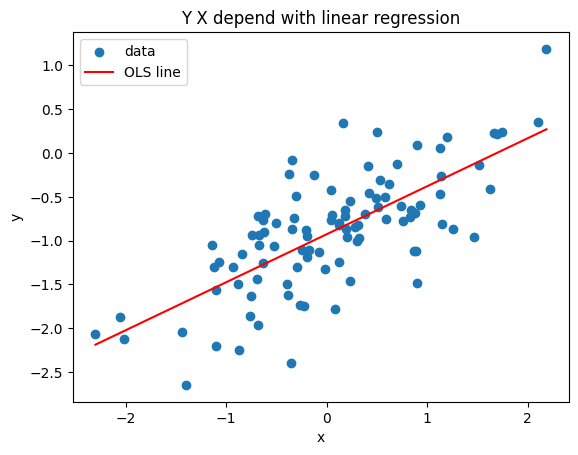

In [7]:
xs = np.linspace(df13["x"].min(), df13["x"].max(), 100)

Xc = sm.add_constant(df13["x"])
model = sm.OLS(df13["y"], Xc).fit()

plt.scatter(df13["x"], df13["y"], label="data")
plt.plot(xs, model.params["const"] + model.params["x"] * xs, color="red", label="OLS line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Y X depend with linear regression")
plt.legend()
plt.show()

In [8]:
Xc = sm.add_constant(df13["x"])
model = sm.OLS(df13["y"], Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           2.20e-17
Time:                        11:54:30   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

In [9]:
model_no_intercept = sm.OLS(df13["y"], df13[["x"]]).fit()
print(model_no_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              16.53
Date:                Mon, 27 Oct 2025   Prob (F-statistic):                    9.60e-05
Time:                        11:57:19   Log-Likelihood:                         -145.27
No. Observations:                 100   AIC:                                      292.5
Df Residuals:                      99   BIC:                                      295.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The constant model produces a slope estimate of 0.5477 and an intercept of -0.9265.
The model without interception gives a slope of 0.4764.
If there is a non-zero true intercept, you must include a constant otherwise the slope will shift.

In [10]:
model.conf_int().loc["x"].tolist()

[0.44261337684768415, 0.6528137568034872]

In [11]:
newX = sm.add_constant(pd.DataFrame({"x":[0,1]}))
preds = model.get_prediction(newX).summary_frame(alpha = 0.05)
print(preds)

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0 -0.926493  0.046989      -1.019741      -0.833246     -1.861456   
1 -0.378780  0.068359      -0.514437      -0.243123     -1.318919   

   obs_ci_upper  
0      0.008469  
1      0.561360  


In [12]:
Xquad = sm.add_constant(pd.DataFrame({"x":df13["x"], "x2":df13["x"]**2}))
model_quad = sm.OLS(df13["y"], Xquad).fit()
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           2.83e-16
Time:                        12:02:57   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

p-value for x^2 ≈ 0.8565 is insignificant. That is, in the generated model the quadratic term is not needed - the model is linear.

bootstrap CI is very similar to analytical CI

---------- 14

In [ ]:
np.random.seed(1)
n = 100
x1 = np.random.rand(n)                   
x2 = 0.5*x1 + np.random.normal(0, 0.1, n)    
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(0,1,n)
df14 = pd.DataFrame({"x1":x1, "x2":x2, "y":y})

# model Y = 2 + 2X1 + 0.3X2 + e


In [ ]:
np.corrcoef(df14["x1"], df14["x2"])[0,1]

#high correlation np.float64(0.8390596222844917)

np.float64(0.8390596222844917)

In [15]:
X = sm.add_constant(df14[["x1","x2"]])
model14 = sm.OLS(df14["y"], X).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           4.40e-07
Time:                        12:08:20   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

In simple regressions both predictors may be significant, but in joint regression the standard errors increase due to collinearity

Collinearity increases the standard errors of the estimates, so the estimate for a particular coefficient may become statistically insignificant even though the model predicts well overall.

For xxample: true coefficients were 2 and 0.3, but in the joint regression x1 turned out to be insignificant, x2 was significant - explanation: x1 and x2 are strongly related and it is difficult to separate the contribution of each.

In [18]:
df14c = df14.copy()
df14c["x1c"] = df14c["x1"] - df14c["x1"].mean()
df14c["x2c"] = df14c["x2"] - df14c["x2"].mean()

#centering often reduces problems with multicollinearity between polynomial/inclusion interactions depending on the situation.

------- 15

In [19]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston.columns = [c.upper() for c in boston.columns]
df = boston.copy()
y = df["CRIM"]
predictors = [c for c in df.columns if c != "CRIM"]

In [ ]:
results = []
for p in predictors:
    X = sm.add_constant(df[[p]])
    model = sm.OLS(y, X).fit()
    results.append({
        "predictor": p,
        "coef": model.params[p],
        "p_value": model.pvalues[p],
        "R2": model.rsquared
    })

simple_df = pd.DataFrame(results).sort_values("p_value")
print(simple_df.head(10))

   predictor       coef       p_value        R2
7        RAD   0.617911  2.693844e-56  0.391257
8        TAX   0.029742  2.357127e-47  0.339614
11     LSTAT   0.548805  2.654277e-27  0.207591
3        NOX  31.248531  3.751739e-23  0.177217
1      INDUS   0.509776  1.450349e-21  0.165310
12      MEDV  -0.363160  1.173987e-19  0.150780
10     BLACK  -0.036280  2.487274e-19  0.148274
6        DIS  -1.550902  8.519949e-19  0.144149
5        AGE   0.107786  2.854869e-16  0.124421
9    PTRATIO   1.151983  2.942922e-11  0.084068


The higher the RAD or TAX - the higher the crime, more DIS - less crime

In [21]:
X_all = sm.add_constant(df[predictors])
model_all = sm.OLS(y, X_all).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.57e-56
Time:                        12:17:15   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

The model explains 45% of the variation in CRIM

In [22]:
simple = pd.Series(
    {r["predictor"]: r["coef"] for _, r in simple_df.iterrows()},
    name="simple_coef"
)
multi = model_all.params[predictors].rename("multi_coef")
compare = pd.concat([simple, multi], axis=1)
print(compare)

         simple_coef  multi_coef
RAD         0.617911    0.588209
TAX         0.029742   -0.003780
LSTAT       0.548805    0.126211
NOX        31.248531  -10.313535
INDUS       0.509776   -0.063855
MEDV       -0.363160   -0.198887
BLACK      -0.036280   -0.007538
DIS        -1.550902   -0.987176
AGE         0.107786    0.001452
PTRATIO     1.151983   -0.271081
RM         -2.684051    0.430131
ZN         -0.073935    0.044855
CHAS       -1.892777   -0.749134


the signs and magnitudes of the coefficients often chang - multicollinearity effect, in simple regressions, variables partially “steal” each other’s explanation

In [24]:
for p in predictors:
    X_poly = sm.add_constant(
        pd.DataFrame({p: df[p], f"{p}_2": df[p]**2, f"{p}_3": df[p]**3})
    )
    model_poly = sm.OLS(y, X_poly).fit()
    if model_poly.pvalues[f"{p}_2"] < 0.05 or model_poly.pvalues[f"{p}_3"] < 0.05:
        print(f"{p}: evidence of non-linear relation")

#if the p-value for X2 or X3 < 0.05, then the relationship is nonlinear

INDUS: evidence of non-linear relation
NOX: evidence of non-linear relation
AGE: evidence of non-linear relation
DIS: evidence of non-linear relation
PTRATIO: evidence of non-linear relation
MEDV: evidence of non-linear relation


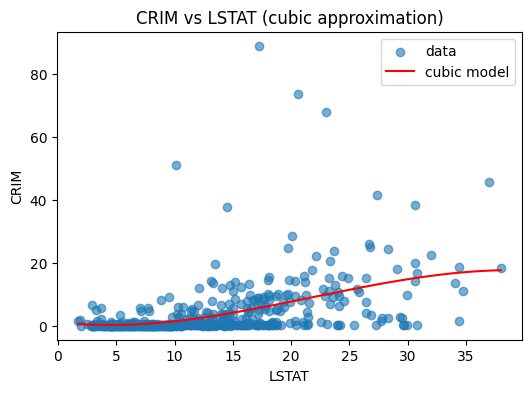

In [26]:
p = "LSTAT"

X_poly = sm.add_constant(
    pd.DataFrame({
        p: df[p],
        f"{p}_2": df[p]**2,
        f"{p}_3": df[p]**3
    })
)
model_poly = sm.OLS(y, X_poly).fit()

x_vals = np.linspace(df[p].min(), df[p].max(), 100)
y_pred = (
    model_poly.params["const"]
    + model_poly.params[p] * x_vals
    + model_poly.params[f"{p}_2"] * x_vals**2
    + model_poly.params[f"{p}_3"] * x_vals**3
)

plt.figure(figsize=(6,4))
plt.scatter(df[p], y, alpha=0.6, label="data")
plt.plot(x_vals, y_pred, color="red", label="cubic model")
plt.xlabel(p)
plt.ylabel("CRIM")
plt.title(f"CRIM vs {p} (cubic approximation)")
plt.legend()
plt.show()